# Citations in the SciELO Citation Index

In the Web of Science,
the *SciELO Citation Index*
can be found
for data coming from SciELO.

Since it's a closed source of information,
there won't be much description on how to grab data from there.
It's known that the Web of Science system
doesn't allow downloading
entries after the $100.000$ (a hundred thousand) position
on any search,
and we can download at most $500$ (five hundreds)
entries in a single CSV.
A concatenation can be performed by just appending results
from different CSVs, but the header line,
besides removing some duplications.

The further analysis was performed on the CSV data
manually extracted from the Web of Science (henceforth WoS)
by Ednilson Gesseff
and concatenated into a single huge CSV.
The selected data is from 2008 to 2017,
including all entries from SciELO Brazil,
as downloaded in August 2018.

In [1]:
import pandas as pd
from scipy import stats
%matplotlib inline

## Making sense of the data

There are hundreds of thousands of lines
(downloading it all wasn't easy!).

In [2]:
wos = pd.read_csv("wos_2008to2017_scielo_brazil.csv",
                  index_col=0,
                  low_memory=False)
print(wos.shape)
wos.columns

(210016, 51)


Index(['Publication Type', 'Authors', 'Editors',
       'English Document Title An English Document Title may have a field tag of X1, Y1, or Z1',
       'Spanish Document Title A Spanish Document Title may have a field tag of T1, Y1, or Z1',
       'Portuguese Document Title A Portuguese Document Title may have a field tag of T1, X1, or Z1',
       'Other Languages Document Title A document title may have a field tag of T1, X1, or Y1',
       'Source', 'Language', 'Document Type', 'English Author Keywords',
       'Spanish Author Keywords', 'Portuguese Author Keywords',
       'Author Keywords Other Languages', 'English Abstract',
       'Spanish Abstract', 'Portuguese Abstract', 'Abstract Other Languages',
       'Addresses', 'E-mail Address', 'ResearcherID Number',
       'ORCID Identifier Open Researcher and Contributor ID',
       'Cited References', 'Cited Reference Count', 'scieloci_cited',
       'scieloci_wos_cited', 'Usage Count Last 180 Days',
       'Usage Count Since 2013',

Each row in this data regards to a single document:

In [3]:
wos.head(3).T

,0,1,2
Publication Type,J,J,J
Authors,"Kellner, Alexander W.A.; Meneghini, Rogerio","Shi, Shuguo","Alves, Célia A."
Editors,NaN,NaN,NaN
"English Document Title An English Document Title may have a field tag of X1, Y1, or Z1",A Special year for the AABC,The hypersurfaces with conformal normal Gauss ...,Characterisation of solvent extractable organi...
"Spanish Document Title A Spanish Document Title may have a field tag of T1, Y1, or Z1",NaN,NaN,NaN
"Portuguese Document Title A Portuguese Document Title may have a field tag of T1, X1, or Z1",NaN,NaN,NaN
"Other Languages Document Title A document title may have a field tag of T1, X1, or Y1",NaN,NaN,NaN
Source,Anais da Academia Brasileira de Ciências,Anais da Academia Brasileira de Ciências,Anais da Academia Brasileira de Ciências
Language,English,English,English
Document Type,editorial,research-article,research-article


And all data comes from the SciELO Brazil collection

In [4]:
wos["collection"].value_counts()

SciELO Brazil    210016
Name: collection, dtype: int64

The rows are from these two days:

In [5]:
wos["Date this report was generated."].dropna().unique()

array(['2018-08-10', '2018-08-12'], dtype=object)

Are there empty columns?

In [6]:
wos_is_empty = wos.isna().all()
wos_is_empty[wos_is_empty].index.tolist()

['Editors', 'E-mail Address', 'Cited References']

Yes! We no longer need these columns.

## Joining with the documents reports

We can join the CSV files from the Web of Science
coming from SciELO CI
with the public SciELO analytics reports
by the documents PID.
For example, we have that in the documents counts CSV:

In [7]:
documents_counts = pd.read_csv("tabs_bra/documents_counts.csv") \
                     .set_index("document publishing ID (PID SciELO)")
documents_counts.head().T

document publishing ID (PID SciELO),S0100-879X1998000800006,S0100-879X1998000800011,S0100-879X1998000800005,S0100-879X1998000800009,S0100-879X1998000800010
extraction date,2018-09-13,2018-09-13,2018-09-13,2018-09-13,2018-09-13
study unit,document,document,document,document,document
collection,scl,scl,scl,scl,scl
ISSN SciELO,0100-879X,0100-879X,0100-879X,0100-879X,0100-879X
ISSN's,0100-879X;1414-431X,0100-879X;1414-431X,0100-879X;1414-431X,0100-879X;1414-431X,0100-879X;1414-431X
title at SciELO,Brazilian Journal of Medical and Biological Re...,Brazilian Journal of Medical and Biological Re...,Brazilian Journal of Medical and Biological Re...,Brazilian Journal of Medical and Biological Re...,Brazilian Journal of Medical and Biological Re...
title thematic areas,Biological Sciences;Health Sciences,Biological Sciences;Health Sciences,Biological Sciences;Health Sciences,Biological Sciences;Health Sciences,Biological Sciences;Health Sciences
title is agricultural sciences,0,0,0,0,0
title is applied social sciences,0,0,0,0,0
title is biological sciences,1,1,1,1,1


However, the PID in the WoS data always starts with a `SCIELO:` prefix:

In [8]:
wos["pid"].str.startswith("SCIELO:").all()

True

We can just remove that prefix:

In [9]:
wos_pids = wos["pid"].str.slice(len("SCIELO:"))
wos_pids.head()

0    S0001-37652008000100001
1    S0001-37652008000100002
2    S0001-37652008000100003
3    S0001-37652008000100004
4    S0001-37652008000100005
Name: pid, dtype: object

### Reference count

As an example of such a match,
there's a `Cited Reference Count` column
in the WoS data.
It's not the number of citations it received,
but the number of references each document has made.
This should be equivalent to the `references` column
in the `documents_counts.csv` SciELO analytics report.
That's matching for about $91\%$ of the data.

True     191371
False     18645
dtype: int64

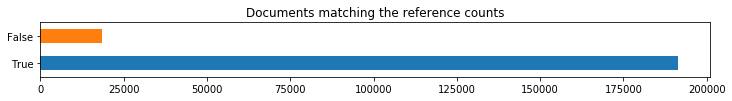

In [10]:
ref_counts = documents_counts["references"]
wos_ref_counts = wos_pids.map(ref_counts)
wos_ref_matches = wos_ref_counts == wos["Cited Reference Count"]
wos_ref_matches.value_counts().sort_index(ascending=False) \
               .plot.barh(figsize=(12, 1),
                          title="Documents matching the reference counts")
wos_ref_matches.value_counts()

It's not clear why the number of references is different,
but as we can see,
in most of these cases that don't match
the reference count in the SciELO analytics report spreadsheet
is higher.
Only $31$ of these values are lower.

In [11]:
different_ref_counts = (wos
    .assign(ref_counts=wos_ref_counts)
    [~wos_ref_matches]
    [["Cited Reference Count", "ref_counts"]]
)
print(different_ref_counts.shape)
different_ref_counts.head()

(18645, 2)


,Cited Reference Count,ref_counts
2,431,432.0
46,48,49.0
110,12,13.0
115,50,51.0
194,41,42.0


In [12]:
less_counts = different_ref_counts[different_ref_counts.iloc[:, 1] <
                                   different_ref_counts.iloc[:, 0]]
print(less_counts.shape)
less_counts.head()

(31, 2)


,Cited Reference Count,ref_counts
30167,101,24.0
30221,14,3.0
49369,39,0.0
58588,30,28.0
58600,21,15.0


## Incoming citation fields

There are two fields regarding the number of citations
each document received:

* `scieloci_cited`:
  number of citations coming from journals
  in the SciELO network;
* `scieloci_wos_cited`:
  number of citations coming from journals
  in the whole Web of Science platform.

These are respectively the `TC` and `Z9` fields in
[the field description documentation](
  https://images.webofknowledge.com/images/help/SCIELO/hs_selo_fieldtags.html
),
which states:

> **TC**: SciELO Citation Index Times Cited Count
>
> **Z9**: Total Times Cited Count
>         (Web of Science Core Collection,
>          BIOSIS Citation Index,
>          Chinese Science Citation Database,
>          Data Citation Index,
>          Russian Science Citation Index,
>          SciELO Citation Index)

Since the SciELO data is in the Web of Science,
every citation in the former should be counted in the latter,
but there are some inconsistent rows:

In [13]:
inconsistent_cites = wos[wos["scieloci_wos_cited"] < wos["scieloci_cited"]]
inconsistent_cites.shape[0]

48

Most ($45$) of these inconsistent entries have a small difference of $1$:

In [14]:
(inconsistent_cites["scieloci_cited"] -
 inconsistent_cites["scieloci_wos_cited"]).value_counts()

1    45
2     2
3     1
dtype: int64

To fix this,
let's simply use the max of these two fields as the number of WoS citations.
Perhaps that's not the case,
but that's enough to avoid "negative" citations when subtracting the values.
That's enough to build our analysis dataset:

In [15]:
wos_cited = wos[["scieloci_wos_cited", "scieloci_cited"]].max(axis=1)
dataset = wos.assign(
    pid=wos_pids,
    total=wos_cited,
    not_sci=wos_cited - wos["scieloci_cited"]
).set_index("pid").rename(columns={
    "Language": "lang",
    "Document Type": "type",
    "scieloci_cited": "sci",
})[["lang", "type", "sci", "not_sci", "total"]]
print(dataset.shape)
dataset.head()

(210016, 5)


,lang,type,sci,not_sci,total
pid,,,,,
S0001-37652008000100001,English,editorial,1,0,1
S0001-37652008000100002,English,research-article,0,0,0
S0001-37652008000100003,English,research-article,1,61,62
S0001-37652008000100004,English,research-article,0,0,0
S0001-37652008000100005,English,research-article,0,9,9


There's no empty entry in this dataset:

In [16]:
dataset.dropna().shape

(210016, 5)

## Overall statistics

As the median is zero (i.e., half of the data have no citations),
it's a quite odd dataset to see in a boxplot.

In [17]:
dataset.describe()

,sci,not_sci,total
count,210016.000000,210016.000000,210016.000000
mean,1.492482,2.098231,3.590712
std,3.834625,5.293388,7.800272
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000
75%,2.000000,2.000000,4.000000
max,767.000000,581.000000,1348.000000


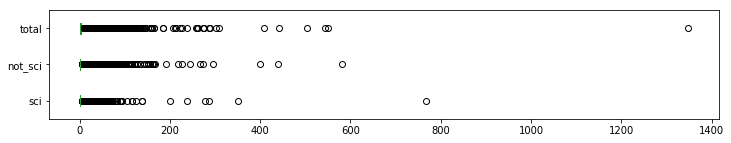

In [18]:
dataset.plot.box(vert=False, figsize=(12, 2));

Zooming in:

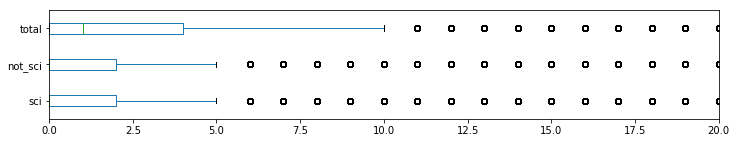

In [19]:
dataset.plot.box(vert=False, figsize=(12, 2), xlim=[0, 20]);

The difference is small even filtering by research articles:

In [20]:
research_articles = dataset[dataset["type"] == "research-article"]
research_articles.describe()

,sci,not_sci,total
count,180780.000000,180780.000000,180780.000000
mean,1.640004,2.224914,3.864919
std,4.037042,5.388988,8.064238
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,1.000000,2.000000
75%,2.000000,2.000000,5.000000
max,767.000000,581.000000,1348.000000


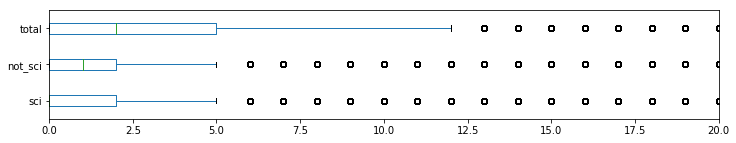

In [21]:
research_articles.plot.box(vert=False, figsize=(12, 2), xlim=[0, 20]);

Fact is, there are a lot of zeros.
If we analyze only the research articles
that have at least one citation, we get:

In [22]:
cited_research_articles = research_articles[research_articles["total"] > 0]
cited_research_articles.describe()

,sci,not_sci,total
count,121011.000000,121011.000000,121011.000000
mean,2.450025,3.323830,5.773855
std,4.728938,6.303373,9.280644
min,0.000000,0.000000,1.000000
25%,0.000000,1.000000,2.000000
50%,1.000000,2.000000,3.000000
75%,3.000000,4.000000,7.000000
max,767.000000,581.000000,1348.000000


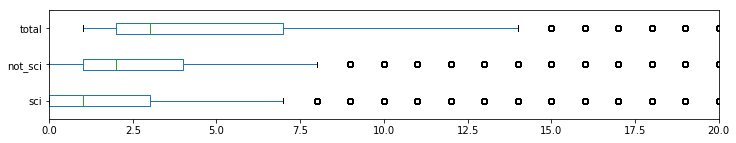

In [23]:
cited_research_articles.plot.box(vert=False, figsize=(12, 2), xlim=[0, 20]);

This analysis shows that,
for a publication in the SciELO network,
we should expect more citations from outside the SciELO network
than from inside it.

## Correlation between the number of citations from SciELO and out from SciELO

The distribution of the difference of the number of citations is:

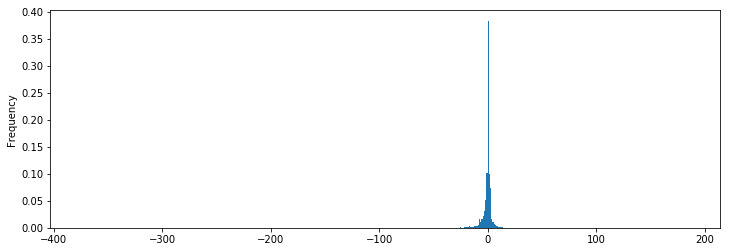

In [24]:
citation_diff = dataset["sci"] - dataset["not_sci"]
citation_diff.plot.hist(bins=500, figsize=(12, 4), density=True);

Zooming in:

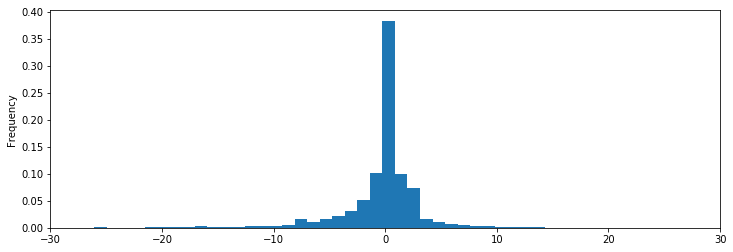

In [25]:
citation_diff.plot.hist(bins=500, figsize=(12, 4), density=True,
                        xlim=[-30, 30]);

The mean is almost zero, but it's negative,
which means the number of citations in WoS not coming from SciELO is higher
than the number of citations coming from SciELO:

In [26]:
cd_mean = citation_diff.mean()
cd_mean

-0.6057490857839403

Is the correlation between the SciELO citations
and non-SciELO citations high?

In [27]:
r, pvalue = stats.pearsonr(dataset["sci"], dataset["not_sci"])
pd.DataFrame([r, r*r, pvalue],
             index=["$r$", "$r^2$", "$p$-value"],
             columns=[""])

,
$r$,0.446344
$r^2$,0.199223
$p$-value,0.000000


It's a quite low value ($r^2 \approx 0.2$),
but significative (small $p$-value, which isn't zero but it's really low).
As expected, the $r$ is positive
(i.e., the more citations a publication has from one source,
       the more we can expect from another,
       given the sources are `sci` and `not_sci`).

*Technical note*:
Another way to perform the same calculation,
without the $p$-value, is:

```python
dataset["sci"].corr(dataset["not_sci"])
```

As the correlation is low,
we shouldn't expect a linear relationship between the number of citations.
Nevertheless,
it's worth seeing the number of citations from each source in a scatterplot.

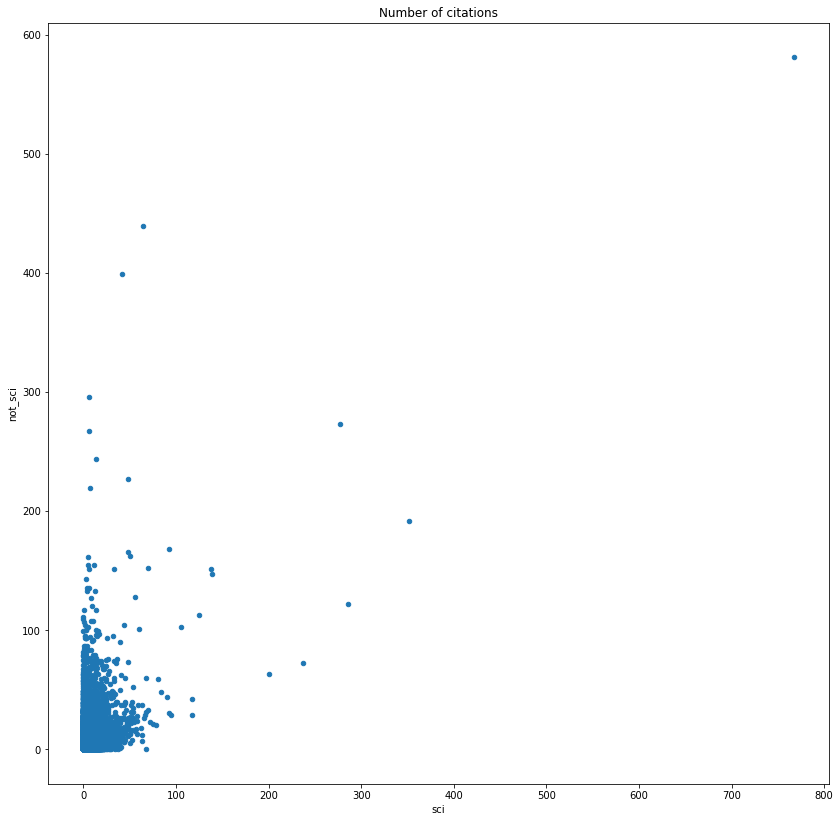

In [28]:
dataset.plot.scatter(x="sci", y="not_sci", figsize=(14, 14),
                     title="Number of citations");

With the previously calculated mean,
we know there are more citations coming from elsewhere
than internal to the SciELO network,
though the numbers aren't much different.

## Analysis of the categorical fields

Most data are in Portuguese:

,lang
German,45
Italian,62
French,222
Spanish,4283
English,87995
Portuguese,117409


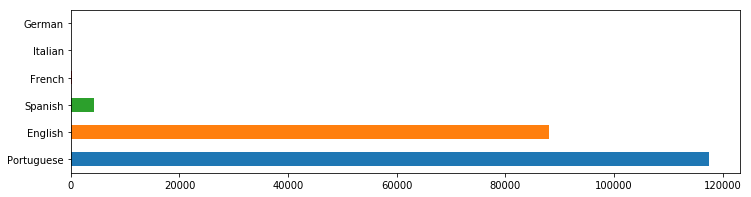

In [29]:
lang_counts = dataset["lang"].value_counts()
lang_counts.plot.barh(figsize=(12, 3))
pd.DataFrame(lang_counts.iloc[::-1])

And most entries are research articles:

,type
news,32
addendum,63
undefined,191
abstract,467
correction,556
press-release,623
article-commentary,697
brief-report,1763
letter,2199
rapid-communication,2975


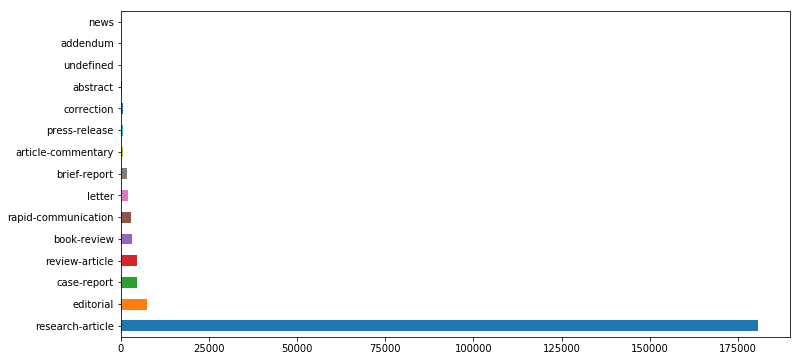

In [30]:
type_counts = dataset["type"].value_counts()
type_counts.plot.barh(figsize=(12, 6))
pd.DataFrame(type_counts.iloc[::-1])

Splitting by both categories, we get:

In [31]:
counts = (dataset
    .groupby(["lang", "type"])
    .size()
    .rename("count")
    .unstack("lang")
    .fillna(0)
    .astype(int)
)
pd.DataFrame(counts)

lang,English,French,German,Italian,Portuguese,Spanish
type,,,,,,
abstract,94,0,0,0,372,1
addendum,15,0,0,0,48,0
article-commentary,300,0,0,0,384,13
book-review,141,3,2,3,2910,114
brief-report,814,1,1,2,930,15
case-report,2791,0,0,1,1779,7
correction,259,0,0,0,290,7
editorial,2300,1,2,2,5004,65
letter,1488,0,0,0,700,11


These are way too much categories to analyze individually,
and many of them are quite small.
But we can see if the language
makes some difference in the statistics of citations
regarding research articles.

In [32]:
ra_stats = research_articles.groupby("lang").describe().T
ra_stats

lang                English      French     German    Italian     Portuguese  \
not_sci count  75273.000000  215.000000  40.000000  52.000000  101225.000000   
        mean       3.409217    0.186047   0.100000   0.250000       1.404791   
        std        7.316331    0.643291   0.378932   0.904780       3.181294   
        min        0.000000    0.000000   0.000000   0.000000       0.000000   
        25%        0.000000    0.000000   0.000000   0.000000       0.000000   
        50%        1.000000    0.000000   0.000000   0.000000       0.000000   
        75%        4.000000    0.000000   0.000000   0.000000       2.000000   
        max      581.000000    6.000000   2.000000   6.000000     192.000000   
sci     count  75273.000000  215.000000  40.000000  52.000000  101225.000000   
        mean       1.059623    0.162791   0.025000   0.057692       2.105834   
        std        3.865018    0.577225   0.158114   0.235435       4.165023   
        min        0.000000    0.000000   0.000000   0.000000       0.000000   
        25%        0.000000    0.000000   0.000000   0.000000       0.000000   
        50%        0.000000    0.000000   0.000000   0.000000       1.000000   
        75%        1.000000    0.000000   0.000000   0.000000       3.000000   
        max      767.000000    4.000000   1.000000   1.000000     352.000000   
total   count  75273.000000  215.000000  40.000000  52.000000  101225.000000   
        mean       4.468840    0.348837   0.125000   0.307692       3.510625   
        std        9.857795    0.997279   0.404304   1.057901       6.542915   
        min        0.000000    0.000000   0.000000   0.000000       0.000000   
        25%        0.000000    0.000000   0.000000   0.000000       0.000000   
        50%        2.000000    0.000000   0.000000   0.000000       1.000000   
        75%        6.000000    0.000000   0.000000   0.000000       4.000000   
        max     1348.000000    9.000000   2.000000   7.000000     544.000000   

lang               Spanish  
not_sci count  3975.000000  
        mean      0.840503  
        std       1.855559  
        min       0.000000  
        25%       0.000000  
        50%       0.000000  
        75%       1.000000  
        max      29.000000  
sci     count  3975.000000  
        mean      0.884780  
        std       1.975009  
        min       0.000000  
        25%       0.000000  
        50%       0.000000  
        75%       1.000000  
        max      39.000000  
total   count  3975.000000  
        mean      1.725283  
        std       3.397948  
        min       0.000000  
        25%       0.000000  
        50%       0.000000  
        75%       2.000000  
        max      62.000000

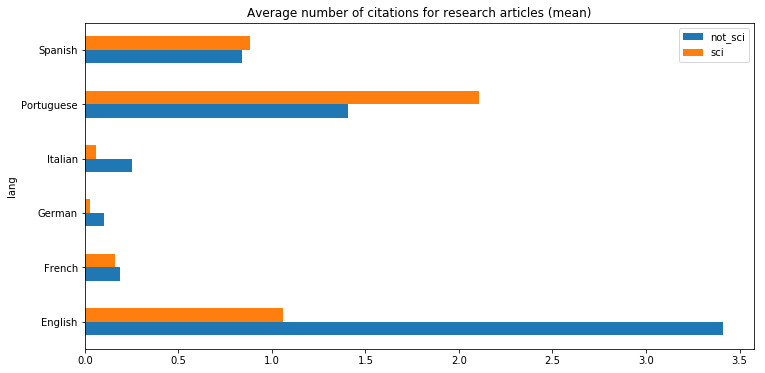

In [33]:
ra_stats.xs("mean", level=1).drop("total").T \
        .plot.barh(figsize=(12, 6),
                   title="Average number of citations "
                         "for research articles (mean)");